Подготовительные действия над датасетом

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/howpop_train.csv")

In [3]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,
    inplace=True,
)

In [4]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=0.75, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

In [5]:
df["published"] = pd.to_datetime(df.published, yearfirst=True)

df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

1. В каком месяце (и какого года) было больше всего публикаций?

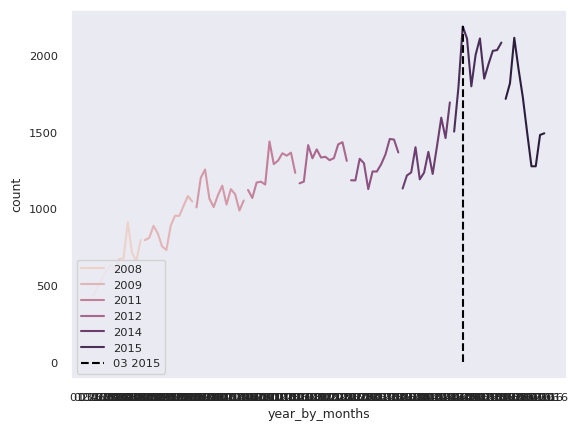

In [6]:
monthly_publications = df.groupby([df['year'], df['month']]).size()
monthly_df = monthly_publications.reset_index()
monthly_df.columns = ['year', 'month', 'count']
monthly_df['year_by_months'] = [f'{month:02} {year:4}' for year, month in zip(monthly_df.year, monthly_df.month)]

sns.lineplot(data=monthly_df, x='year_by_months', y='count', hue='year')
max_monthly = monthly_df[monthly_df['count'] == monthly_df['count'].max()]

plt.vlines(max_monthly['year_by_months'], 0, max_monthly['count'], ls='--', label=max_monthly['year_by_months'].item(), colors=['black'])
plt.legend(loc="lower left")

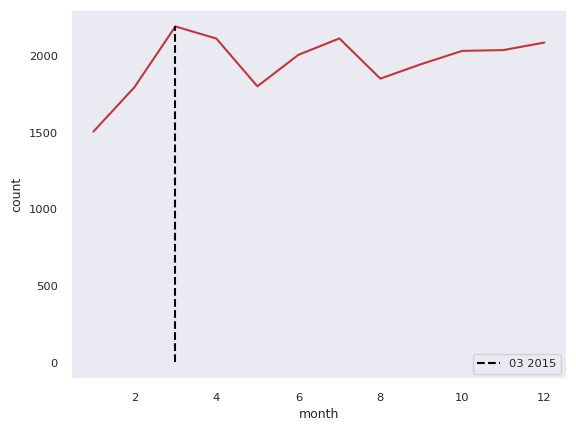

In [7]:
monthly_of_2015 = monthly_df[monthly_df['year'] == 2015]
sns.lineplot(data=monthly_of_2015, x='month', y='count')
max_monthly_of_2015 = monthly_of_2015[monthly_of_2015['count'] == monthly_of_2015['count'].max()]

plt.vlines(max_monthly_of_2015['month'], 0, max_monthly_of_2015['count'], ls='--', label=max_monthly_of_2015['year_by_months'].item(), colors=['black'])
plt.legend(loc="lower right")

2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

Один или несколько дней сильно выделяются из общей картины
На хабре всегда больше статей, чем на гиктаймсе
По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

<Axes: xlabel='day', ylabel='count'>

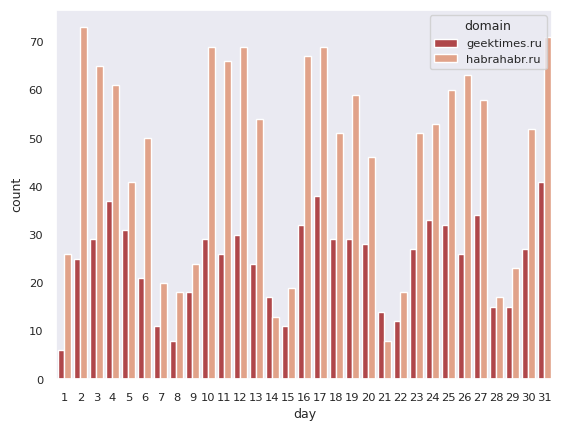

In [8]:
max_year_df = df[df['year'] == max_monthly['year'].item()]
max_month_df = max_year_df[max_year_df['month'] == max_monthly['month'].item()]

daily_groups = max_month_df.groupby([max_month_df['day'], max_month_df['domain']]).size()

daily_df = daily_groups.reset_index()
daily_df.columns = ['day', 'domain', 'count']

sns.barplot(data=daily_df, x='day', y='count', hue='domain')

In [9]:
habrahabr_df = daily_df[daily_df['domain'] == 'habrahabr.ru']
geektimes_df = daily_df[daily_df['domain'] == 'geektimes.ru']

composed_df = habrahabr_df.merge(geektimes_df, on='day', suffixes=('_habr', '_geek'), how='inner')

composed_df[composed_df['count_habr'] < composed_df['count_geek']]

,day,domain_habr,count_habr,domain_geek,count_geek
13,14,habrahabr.ru,13,geektimes.ru,17
20,21,habrahabr.ru,8,geektimes.ru,14


<Axes: xlabel='day', ylabel='count'>

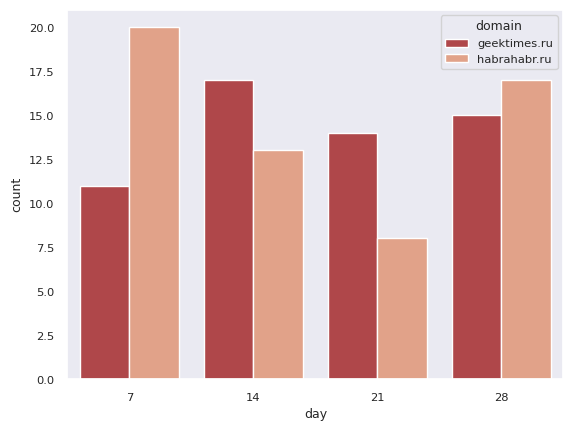

In [10]:
sat_groups = max_month_df[max_month_df['dayofweek'] == 6].groupby([max_month_df['day'], max_month_df['domain']]).size()

sat_df = sat_groups.reset_index()
sat_df.columns = ['day', 'domain', 'count']

sns.barplot(data=sat_df, x='day', y='count', hue='domain')

3. Когда лучше всего публиковать статью?

<Axes: xlabel='hour', ylabel='views'>

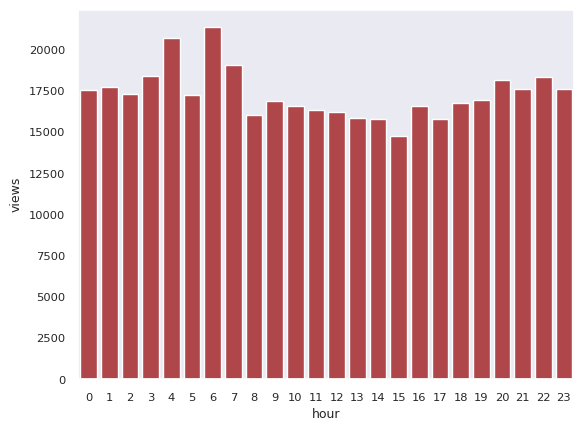

In [11]:
hourly_publications = df.groupby([df['hour']]).mean(True)
hourly_domain_publications = df.groupby([df['hour'], df['domain']]).mean(True)

sns.barplot(data=hourly_publications, x='hour', y='views')

<Axes: xlabel='hour', ylabel='views'>

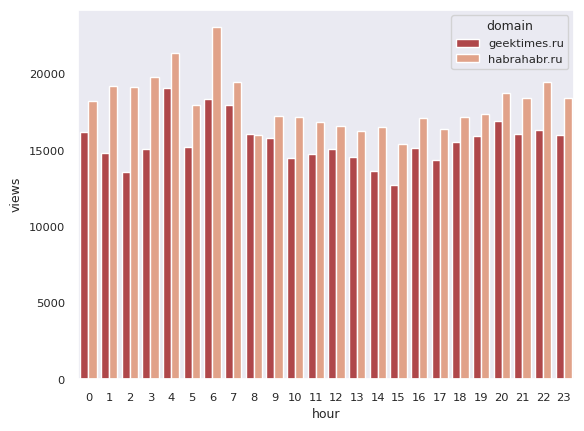

In [12]:
sns.barplot(data=hourly_domain_publications, x='hour', y='views', hue='domain')

<Axes: xlabel='hour', ylabel='comments'>

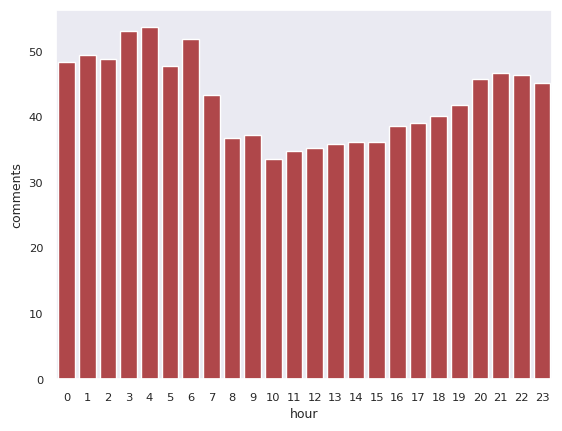

In [13]:
sns.barplot(data=hourly_publications, x='hour', y='comments')

<Axes: xlabel='hour', ylabel='comments'>

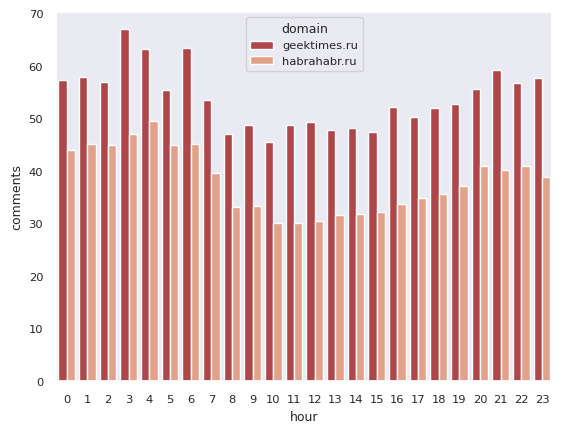

In [14]:
sns.barplot(data=hourly_domain_publications, x='hour', y='comments', hue='domain')

<Axes: xlabel='hour', ylabel='views'>

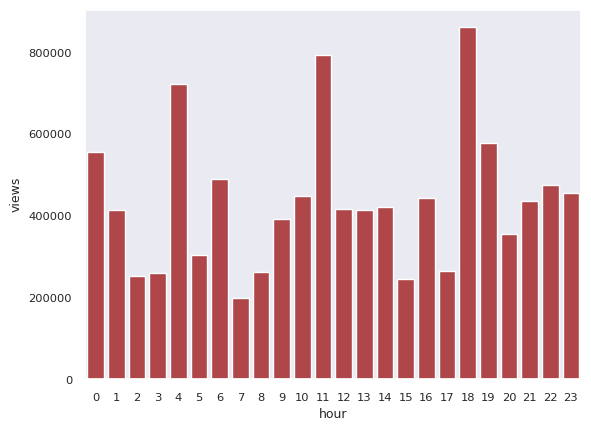

In [15]:
geektimes_hourly = df[df['domain'] == 'geektimes.ru'].groupby('hour').max(True)
sns.barplot(data=geektimes_hourly, x='hour', y='views')

4. Кого из топ-20 авторов чаще всего минусуют?

In [16]:
top_20 = df.groupby([df['author']])['author'].count().sort_values(ascending=False).iloc[:20].keys()
top_20

Index(['@alizar', '@marks', '@SLY_G', '@ivansychev', '@semen_grinshtein',
       '@jeston', '@aleksandrit', '@XaocCPS', '@Mithgol', '@Mordatyj',
       '@Shapelez', '@ilya42', '@atomlib', '@ragequit', '@Tylerskald',
       '@andorro', '@jasiejames', '@lozga', '@Sterhel', '@azazelis'],
      dtype='object', name='author')

<Axes: xlabel='author', ylabel='votes_minus'>

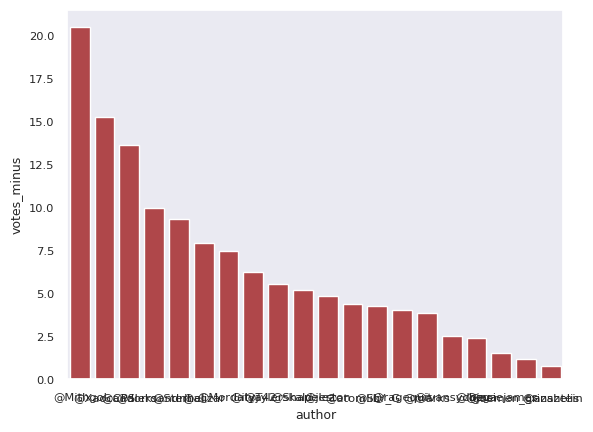

In [19]:
top_20_df = df[df['author'].isin(top_20)]
most_minused = top_20_df.groupby(df['author'])['votes_minus'].mean().sort_values(ascending=False)[:5]
sns.barplot(data=most_minused)

5. Сравните субботы и понедельники

<Axes: xlabel='hour', ylabel='count'>

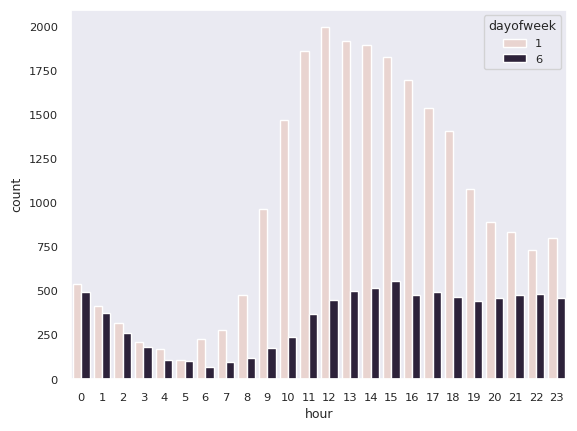

In [18]:
daily_groups = df[df['dayofweek'].isin([1, 6])].groupby([df['dayofweek'], df['hour']]).size()

daily_df = daily_groups.reset_index()
daily_df.columns = ['dayofweek', 'hour', 'count']

sns.barplot(data=daily_df, x='hour', y='count', hue='dayofweek')
